In [1]:
#Import the modules
from sklearn.datasets import load_breast_cancer;
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [65]:
bc = load_breast_cancer()
print(bc.data.shape)

#X, y = load_breast_cancer(return_X_y=True)
X = bc.data
y = bc.target

(569, 30)


In [66]:
# split the data train and test 80 to 20
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
model = LogisticRegression(max_iter=2000).fit(X_train, y_train)

In [25]:
y_prob  = model.predict_proba(X_test)[:,1]

(array([0.        , 0.5       , 0.        , 0.5       , 1.        ,
        0.5       , 1.        , 0.85714286, 1.        ]),
 array([0.00489012, 0.11762377, 0.24523044, 0.32677911, 0.45295902,
        0.54994838, 0.73532731, 0.85124786, 0.98764035]))

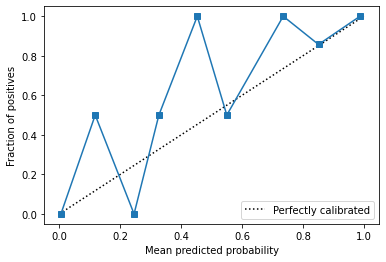

In [45]:
#apply logistic regression
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibrationDisplay
from matplotlib import pyplot as plt
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()
prob_true, prob_pred

In [67]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

C:\Users\kmandadi\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([0.        , 0.        , 0.375     , 0.93333333, 0.78571429]),
 array([0.05835165, 0.34259244, 0.51224834, 0.72629157, 0.83579113]))

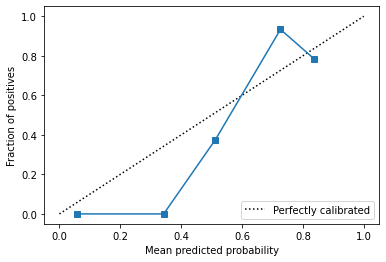

In [68]:
#apply feature selection l1 with penalty
modelL1 = LogisticRegression(C=1, penalty = 'l1', solver='saga').fit(X_train, y_train)
y_L1prob  = modelL1.predict_proba(X_test)[:,1]
true_probl1, predicted_probl1 = calibration_curve(y_test,y_L1prob)
disp = CalibrationDisplay(true_probl1,predicted_probl1,y_L1prob)
disp.plot()
true_probl1, predicted_probl1

C:\Users\kmandadi\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([0.        , 0.        , 0.375     , 0.93333333, 0.78571429]),
 array([0.05822458, 0.34211293, 0.51196397, 0.7262909 , 0.83581156]))

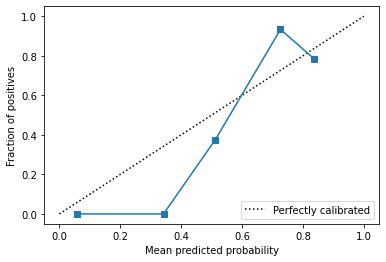

In [69]:
#apply feature selection elasticnet with penalty
modelEl = LogisticRegression(solver="saga", penalty = "elasticnet", l1_ratio=1 )
modelEl.fit(X_train, y_train)
y_Elprob  = modelEl.predict_proba(X_test)[:,1]
true_probEl, predicted_probEl = calibration_curve(y_test,y_Elprob)
disp = CalibrationDisplay(true_probEl,predicted_probEl,y_Elprob)
disp.plot()
true_probEl, predicted_probEl

There is an improvement in the calibration curve with and without feature selection, However there is no difference in the predection between L1 and elasticnet feature.